<a href="https://colab.research.google.com/github/Chebem/VoiceSense/blob/main/VoiceSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VoiceSense – Multilingual Voice Intent + Emotion Classifier

**VoiceSense** is a real-world voice AI project that detects both the **intent** (e.g., lost card, report scam) and **emotion** (e.g., angry, calm) behind a short spoken command — across multiple languages.

---

##  Project Objective
To build and fine-tune a robust, multilingual speech emotion recognition (SER) model that:

1. Predicts emotional tone (e.g., angry, happy, sad) from raw audio.
2. Trains on combined, real-world datasets (RAVDESS + CREMA-D).
3. Generalizes across speaker identities, accents, and noise levels.

--------

## 🌍 Supported Languages

| Language       | Code |
|----------------|------|
| 🇺🇸 English     | `en` |
| 🇮🇳 Hindi       | `hi` |
| 🇺🇦 Ukrainian   | `uk` |
| 🇰🇭 Khmer       | `km` |
| 🇦🇿 Azerbaijani | `az` |
| 🌐 Others       | via Mozilla CommonVoice |

---

## 🛠️ Core Tech Stack

| Layer                  | Tool / Library                                                              |
|------------------------|-----------------------------------------------------------------------------|
| Audio Preprocessing    | `librosa`, `ffmpeg`, `pydub`, `torchaudio`                                  |
| Audio Standardization  | 16kHz mono sampling, padded/truncated `Mel spectrograms`                    |
| Dataset Preparation    | `RAVDESS`, `CREMA-D`, expandable to TESS/SAVEE/CommonVoice                  |
| Emotion Detection      | `Deep CNN` on Mel Spectrograms (PyTorch), optional `Whisper + GPT fallback` |
| Intent Classification  | `xlm-roberta-base`, `bert-multilingual-cased` (Hugging Face, future phase)  |
| Model Training         | `PyTorch`, `sklearn`, `torch.nn`, `torchvision`, (optional `Lightning`)     |
| Augmentation           | `audiomentations` (`PitchShift`, `AddGaussianNoise`, `Shift`, etc.)         |
| Evaluation             | `classification_report`, `confusion_matrix`, `F1-score`, (ASR: `jiwer`)     |
| Optional LLM Fallback  | `OpenAI GPT-3.5`, `Flan-T5`, `Whisper`, `T5` (Hugging Face, fallback only)   |

---

##  Supported Intents

| Intent           | Example Phrase                           |
|------------------|-------------------------------------------|
| `open_account`    | "I want to open a bank account."          |
| `credit_card`     | "My credit card isn’t working."           |
| `remittance`      | "How do I send money abroad?"             |
| `report_scam`     | "I was scammed online."                   |
| `currency_exchange` | "Where can I exchange currency?"       |
| `atm_issue`       | "The ATM ate my card!"                    |

---

## Emotion Categories

| Emotion     | Example Voice Tone     |
|-------------|------------------------|
| `angry`     | Frustrated, loud, tense |
| `calm`      | Neutral, slow, composed |
| `confused`  | Hesitant, unsure, rising intonation |
| `anxious`   | Quick pace, shaky tone  |

---

## Sample Use Cases

🎙️ `"My ATM card isn’t working!"`  
→ **Intent**: `atm_issue`  
→ **Emotion**: `frustrated`

🎙️ `"Transfer money to my country."`  
→ **Intent**: `remittance`  
→ **Emotion**: `calm`

🎙️ `"They scammed me!"`  
→ **Intent**: `report_scam`  
→ **Emotion**: `angry`



##  System Architecture – VoiceSense

  User speaks (any language)
         │
         ▼
Audio Input (.wav/.mp3 via upload or mic)
         │
         ▼
         Preprocessing (librosa, ffmpeg, torchaudio)
│
▼
Transcription (Whisper ASR – multilingual)
│
▼
Text Output (transcribed sentence)
┌──────────────┴───────────────┐
▼                              ▼
Intent Classifier         Emotion Detector
(XLM-R / mBERT)             (CNN on audio or GPT on text)
▼                              ▼
Intent Label             Emotion Label
└──────────────┬───────────────┘
▼
Final Output (JSON or UI Display)
{
“text”: “I lost my card.”,
“intent”: “lost_card”,
“emotion”: “frustrated”
}

---

## ✅ Status & Next Steps

- ✅ CREMA_D & RAVDESS datasets downloaded
- 🔄 Transcription using Whisper in progress
- 🔄 Intent + emotion label tagging
- 🛠 Model training phase starting soon

---

## 🪪 License

MIT — Free for research and educational use.


---

## 🔄 Dataset Usage Timeline

| Stage               | Dataset                    | Use Case                                 | Size     | When?              |
|---------------------|----------------------------|-------------------------------------------|----------|---------------------|
| Debug & Prototyping | 100 English Samples        | Manual Emotion Label UI + Whisper STT    | ✅ 100    | Now (testing phase) |
| Core Training       | 1000 English Samples       | Emotion classifier model training         | 1000     | After UI labeled    |
| Real Audio          | 40+ Real Collected Audio   | Intent classification (real + noisy)     | 40+      | Final evaluation    |
| Expansion           | Hindi, AZ, KM...           | Cross-lingual generalization              | 100–300 ea | Optional Later   |

---

## 🔧 What's Next

### Step 6: Emotion Labeling UI
Create a widget interface to manually label 100 transcriptions with:
- `happy`, `neutral`, `angry`, `sad`, `calm`, `confused`

💾 Save output as: `emotion_labels.csv`

---

## After That

1. Merge transcriptions + emotion labels into a single training file.
2. Extract Mel Spectrograms from audio.
3. Train a CNN model on spectrogram → emotion.
4. (Optionally) Evaluate intent on real audio set.
5. Export model or deploy as demo.

---

### 🗃️ Copy Subset of Validated Audio from `clips/` and `clips2/`
This script loads a sampled subset from `validated.tsv` and copies the corresponding `.mp3` files from multiple directories (`clips/`, `clips2/`) into a single training directory.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **IMPORT LIBRARIES**

In [ ]:
# General Utilities
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Visualization & Debugging
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display as ipd

# Audio Processing
import librosa
import soundfile as sf
import joblib

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)

#  Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Librosa version: {librosa.__version__}")
print(f"Numpy version: {np.__version__}")

TensorFlow version: 2.18.0
Librosa version: 0.10.2.post1
Numpy version: 2.0.2


## Step 1: Explore RAVDESS and CREMA-D Dataset Structure


**RAVDESS** – Ryerson Audio-Visual Database of Emotional Speech and Song
- Samples: 1,440 audio clips
- Speakers: 24 professional actors (12 male, 12 female)
- 	Emotions: neutral, calm, happy, sad, angry, fearful, disgusted, surprised
- Format: Audio-only speech files in
  .wav format

Preview how the audio files are organized and what emotion labels they contain.

------------
**CREMA-D**– Crowd-sourced Emotional Multimodal Actors Dataset

Description
CREMA-D contains 7,442 audio clips from 91 actors (48 male, 43 female), covering 6 emotions:
- neutral
- 	happy
- sad
- 	angry
- fearful
- disgust



In [ ]:
!/content/drive/MyDrive/VoiceSense_Dataset/Ravdees

/bin/bash: line 1: /content/drive/MyDrive/VoiceSense_Dataset/Ravdees: Is a directory


In [9]:
import shutil
import os

# Define folders to delete (adjust as needed)
folders_to_delete = [
    "/content/drive/MyDrive/VoiceSense_Dataset/Ravdees/ravdess_spectrograms",
    "/content/drive/MyDrive/VoiceSense_Dataset/crema_spectrograms"
]

# Delete them if they exist
for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"✅ Deleted: {folder}")
    else:
        print(f"❌ Folder not found (already gone?): {folder}")

❌ Folder not found (already gone?): /content/drive/MyDrive/VoiceSense_Dataset/Ravdees/ravdess_spectrograms
❌ Folder not found (already gone?): /content/drive/MyDrive/VoiceSense_Dataset/crema_spectrograms


In [18]:
RAVDESS_PATH = "/content/drive/MyDrive/VoiceSense_Dataset/Ravdees/"

In [20]:
import os
import pandas as pd

def load_ravdess(ravdess_path):
    """
    Load RAVDESS dataset and extract emotion labels from filenames.
    Expected format: '03-01-01-01-01-01-01.wav'
    """
    emotion_map = {
        '01': 'neutral',
        '02': 'calm',
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'
    }

    file_emotion = []
    file_path = []

    if not os.path.exists(ravdess_path):
        raise FileNotFoundError(f"RAVDESS path not found: {ravdess_path}")

    for actor_folder in os.listdir(ravdess_path):
        actor_dir = os.path.join(ravdess_path, actor_folder)

        if not os.path.isdir(actor_dir):
            continue

        for file in os.listdir(actor_dir):
            parts = file.split('-')
            if len(parts) < 3:
                continue
            emotion_code = parts[2]
            emotion = emotion_map.get(emotion_code)
            if emotion:
                file_emotion.append(emotion)
                file_path.append(os.path.join(actor_dir, file))

    return pd.DataFrame({'Emotion': file_emotion, 'Path': file_path})

# ✅ Call the function and store the result in a DataFrame
ravdess_df = load_ravdess(RAVDESS_PATH)

# 🔍 Check the class balance
print(ravdess_df['Emotion'].value_counts())

Emotion
fearful      198
calm         197
angry        197
happy        196
sad          195
disgust      195
surprised    194
neutral       98
Name: count, dtype: int64


In [25]:
CREMA_PATH = "/content/drive/MyDrive/VoiceSense_Dataset/CREMA-D"

In [26]:
import os
import pandas as pd

def load_crema(crema_path):
    """
    Load CREMA-D dataset and extract emotion labels from filenames.
    Expected filename format: 'XXXX_TTTT_EMO_ACTOR.wav'
    Example: '1022_IEO_HAP_HI.wav'
    """
    emotion_map = {
        'SAD': 'sad',
        'ANG': 'angry',
        'DIS': 'disgust',
        'FEA': 'fearful',
        'HAP': 'happy',
        'NEU': 'neutral'
    }

    file_emotion = []
    file_path = []

    if not os.path.exists(crema_path):
        raise FileNotFoundError(f"CREMA-D path not found: {crema_path}")

    for file in os.listdir(crema_path):
        if not file.endswith(".wav"):
            continue  # skip non-audio files
        parts = file.split('_')
        if len(parts) < 3:
            continue  # malformed filename
        emotion_code = parts[2]
        emotion = emotion_map.get(emotion_code)
        if emotion:
            file_emotion.append(emotion)
            file_path.append(os.path.join(crema_path, file))

    return pd.DataFrame({'Emotion': file_emotion, 'Path': file_path})

crema_df = load_crema(CREMA_PATH)

print("CREMA-D Emotion Distribution:\n")
print(crema_df['Emotion'].value_counts())

CREMA-D Emotion Distribution:

Emotion
sad        807
happy      806
disgust    806
angry      806
fearful    806
neutral    691
Name: count, dtype: int64


In [27]:
#  Load and combine both datasets
ravdess_df = load_ravdess(RAVDESS_PATH)
crema_df = load_crema(CREMA_PATH)

# Merge and filter to shared emotion labels
combined_df = pd.concat([ravdess_df, crema_df], axis=0)
combined_df = combined_df[combined_df['Emotion'].isin(
    ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgust'])]

# Preview stats
print("Combined dataset sample count per emotion:")
print(combined_df['Emotion'].value_counts())

Combined dataset sample count per emotion:
Emotion
fearful    1004
angry      1003
happy      1002
sad        1002
disgust    1001
neutral     789
Name: count, dtype: int64


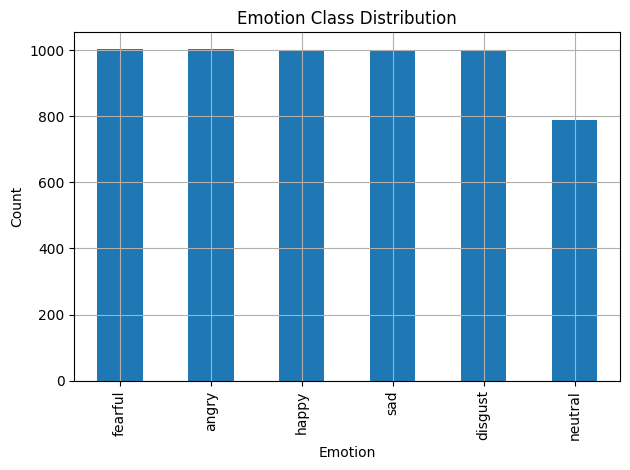

In [28]:
import matplotlib.pyplot as plt

combined_df['Emotion'].value_counts().plot(kind='bar', title='Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mel Spectrogram Extraction (RAVDESS and CREMA-D)
Converting raw .wav files from the **RAVDESS** and **CREMA-D** datasets into Mel spectrograms. These are compact, visual representations of sound, ideal for feeding into a CNN-based model

---

### Objective:
Transform audio files into a machine-learning-ready format (Mel spectrograms) and prepare metadata for training the emotion classifier.

---

###Emotion Label Mapping

| Emotion ID | Emotion     |
|------------|-------------|
| 01         | Neutral     |
| 02         | Happy       |
| 03         | Sad         |
| 04         | Angry       |
| 05         | Fearful     |
| 06         | Disgust     |



In [29]:
print(combined_df.columns)
print(combined_df[['Path', 'Emotion']].head())

Index(['Emotion', 'Path'], dtype='object')
                                                Path  Emotion
1  /content/drive/MyDrive/VoiceSense_Dataset/Ravd...  fearful
2  /content/drive/MyDrive/VoiceSense_Dataset/Ravd...    happy
3  /content/drive/MyDrive/VoiceSense_Dataset/Ravd...  neutral
4  /content/drive/MyDrive/VoiceSense_Dataset/Ravd...  disgust
5  /content/drive/MyDrive/VoiceSense_Dataset/Ravd...    happy


In [30]:
combined_df = combined_df[combined_df['Path'].str.endswith('.wav')]

In [32]:
import librosa
import numpy as np
from tqdm import tqdm

def extract_mel_spectrogram(file_path, n_mels=128, fixed_frames=130, sr=22050):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Pad or trim to fixed shape (n_mels, fixed_frames)
        if mel_spec_db.shape[1] < fixed_frames:
            pad_width = fixed_frames - mel_spec_db.shape[1]
            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, pad_width)), mode='constant')
        else:
            mel_spec_db = mel_spec_db[:, :fixed_frames]

        return mel_spec_db
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")
        return None

# Track failed files
failed_files = []

# Extract Mel spectrograms for the balanced dataset
mel_specs = []
labels = []

print("🔄 Extracting Mel spectrograms...")
for i, row in tqdm(combined_df.iterrows(), total=len(combined_df)):
    mel = extract_mel_spectrogram(row['Path'])
    if mel is not None:
        mel_specs.append(mel)
        labels.append(row['Emotion'])

# Convert to arrays with fixed shape
X = np.stack(mel_specs)  # (num_samples, n_mels, fixed_frames)
y = np.array(labels)

print(f"\n✅ Feature extraction complete. Shape of X: {X.shape}, y: {y.shape}")



🔄 Extracting Mel spectrograms...


100%|██████████| 5801/5801 [03:17<00:00, 29.38it/s]



✅ Feature extraction complete. Shape of X: (5801, 128, 130), y: (5801,)


In [33]:
import numpy as np
import pandas as pd
import os
import shutil

# Paths
OLD_PATHS = [
    "/content/drive/MyDrive/VoiceSense_Dataset/mel_data",
    "/content/drive/MyDrive/VoiceSense_Dataset/mel_data2"
]
NEW_SAVE_DIR = "/content/drive/MyDrive/VoiceSense_Dataset/mel_data3"

# Delete old directories
for path in OLD_PATHS:
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"Deleted old directory: {path}")
    else:
        print(f"⚠️ Directory not found (already deleted?): {path}")

# Create new save directory
os.makedirs(NEW_SAVE_DIR, exist_ok=True)
print(f"Created new save directory: {NEW_SAVE_DIR}")

# Save new data
np.save(os.path.join(NEW_SAVE_DIR, "mel_spectrograms.npy"), X)
np.save(os.path.join(NEW_SAVE_DIR, "labels.npy"), y)
pd.DataFrame({'Emotion': y}).to_csv(os.path.join(NEW_SAVE_DIR, "labels.csv"), index=False)

print(f"✅ New mel data saved to {NEW_SAVE_DIR}")

Deleted old directory: /content/drive/MyDrive/VoiceSense_Dataset/mel_data
Deleted old directory: /content/drive/MyDrive/VoiceSense_Dataset/mel_data2
Created new save directory: /content/drive/MyDrive/VoiceSense_Dataset/mel_data3
✅ New mel data saved to /content/drive/MyDrive/VoiceSense_Dataset/mel_data3


## **Visualize Mel Spectrogram**

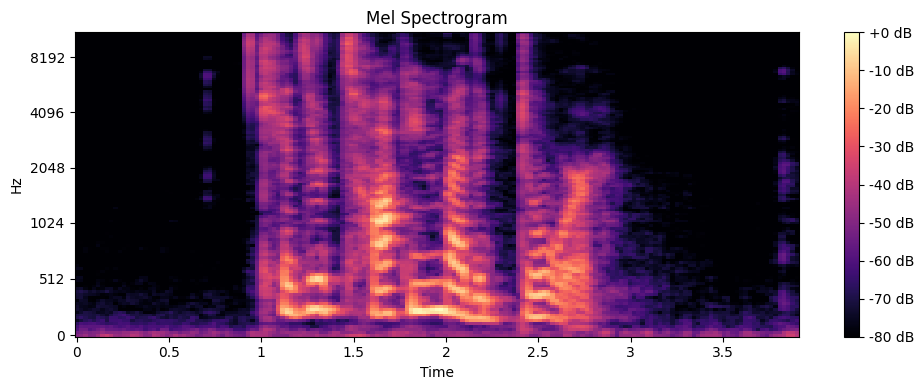

In [34]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Pick the first audio path from your balanced_df
sample_path = combined_df['Path'].iloc[3]

# Load the audio
data, sr = librosa.load(sample_path, sr=22050)

# Compute Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# **MFCC Visualization**

-------

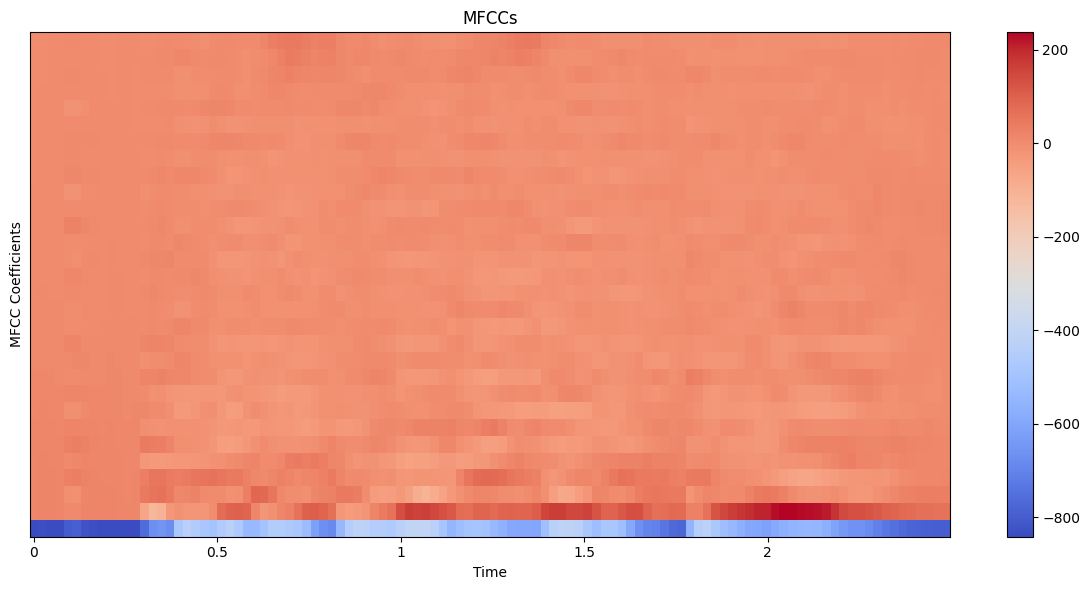

In [35]:
import IPython.display as ipd

# Load audio file
data, sr = librosa.load(sample_path, duration=2.5, offset=0.6)

# Compute MFCCs
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

#  Plot MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.title('MFCCs')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.tight_layout()
plt.show()

#  Play audio
ipd.Audio(data, rate=sr)

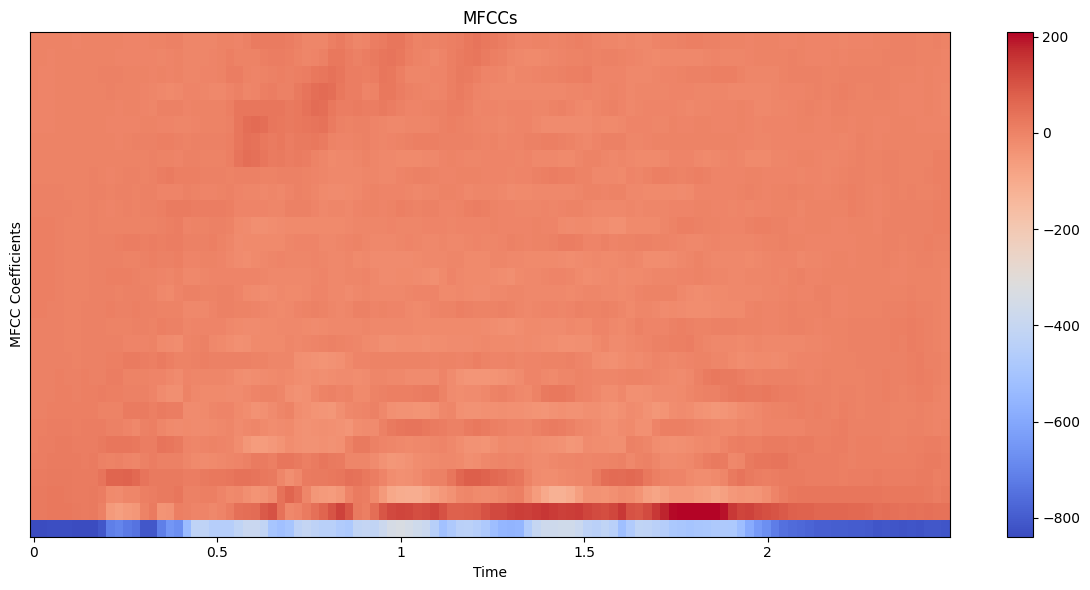

In [36]:
import IPython.display as ipd

# Load audio file
data, sr = librosa.load(combined_df['Path'].iloc[4]
, duration=2.5, offset=0.6)

# Compute MFCCs
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

#  Plot MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.title('MFCCs')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.tight_layout()
plt.show()

#  Play audio
ipd.Audio(data, rate=sr)

## 🎧 Audio Preprocessing and Feature Extraction

This section defines the core preprocessing logic for the VoiceSense project. It includes:

- Audio loading
- Data augmentation (noise, pitch shift)
- Feature extraction (ZCR, RMSE, MFCC)
- A utility to extract multiple feature versions per audio sample (augmented data)

---

### 1. Load Audio File





In [37]:
def load_audio(path, duration=2.5, offset=0.6, sr=22050):
    audio, sr = librosa.load(path, duration=duration, offset=offset, sr=sr)
    return audio, sr

### 2. Data Augmentation Techniques

- `add_noise`: adds Gaussian noise to the signal
- `stretch_audio`: stretches the audio (⚠️ disabled for now)
- `shift_audio`: time-shifts the audio
- `pitch_shift`: changes the pitch of the audio

In [38]:
def add_noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    return data + noise_amp * np.random.normal(size=data.shape[0])

def stretch_audio(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift_audio(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch_shift(data, sr, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=pitch_factor)


### 🎼 3. Feature Extraction Functions

 Extract 3 main features:
- **ZCR**: Zero Crossing Rate
- **RMSE**: Root Mean Square Energy
- **MFCC**: Mel Frequency Cepstral Coefficients


In [39]:
def zcr(data, frame_length=2048, hop_length=512):
    return np.squeeze(librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length))

def rmse(data, frame_length=2048, hop_length=512):
    return np.squeeze(librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length))

def mfcc_features(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
    return np.ravel(mfcc.T) if flatten else np.squeeze(mfcc.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    return np.hstack([
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc_features(data, sr, frame_length, hop_length)
    ])


### 4. Apply Augmentations and Extract All Variants

This function loads the audio, applies data augmentation, and extracts features from each version.

###  Configure Audio Augmentation  
Defines an augmentation pipeline with random transformations:
- Add Gaussian noise  
- Stretch time (tempo)  
- Shift pitch (semitones)  
- Shift in time (left/right)  
Used only on training samples to improve generalization.




In [40]:
def get_features(path, duration=2.5, offset=0.6):
    data, sr = load_audio(path, duration, offset)

    features = []

    # 1. Original
    features.append(extract_features(data, sr))

    # 2. Noise
    features.append(extract_features(add_noise(data), sr))

    # 3. Pitch Shift
    features.append(extract_features(pitch_shift(data, sr), sr))

    # 4. Pitch + Noise
    pitch_plus_noise = add_noise(pitch_shift(data, sr))
    features.append(extract_features(pitch_plus_noise, sr))

    return np.vstack(features)

# **Play Original, Noise, and Pitch-shifted Audio**

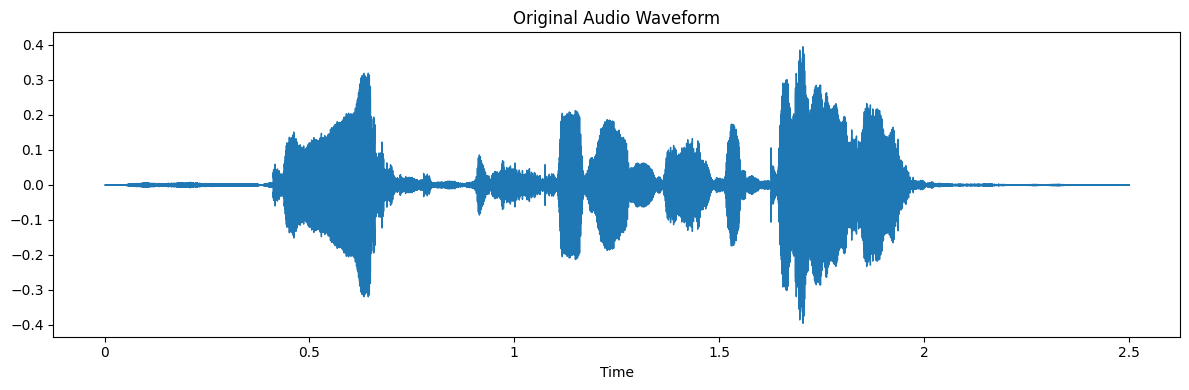

▶Playing Original Audio:


In [41]:
# Original Audio
sample_path = combined_df.iloc[0]['Path']
data, sr = load_audio(sample_path)

# Plot
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr)
plt.title("Original Audio Waveform")
plt.tight_layout()
plt.show()


print("▶Playing Original Audio:")
ipd.display(ipd.Audio(data, rate=sr))

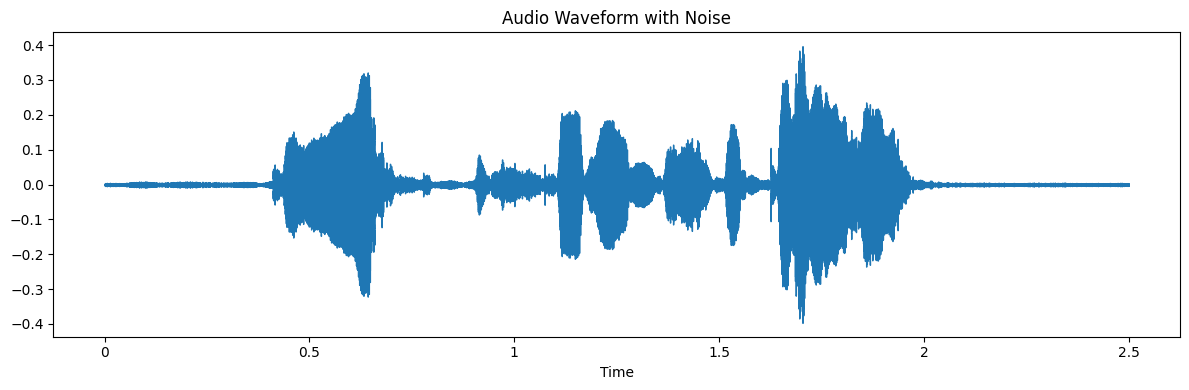

▶️ Playing Noisy Audio:


In [66]:
# Add noise
data_noise = add_noise(data)

# Plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_noise, sr=sr)
plt.title("Audio Waveform with Noise")
plt.tight_layout()
plt.show()

print("▶️ Playing Noisy Audio:")
ipd.display(ipd.Audio(data_noise, rate=sr))

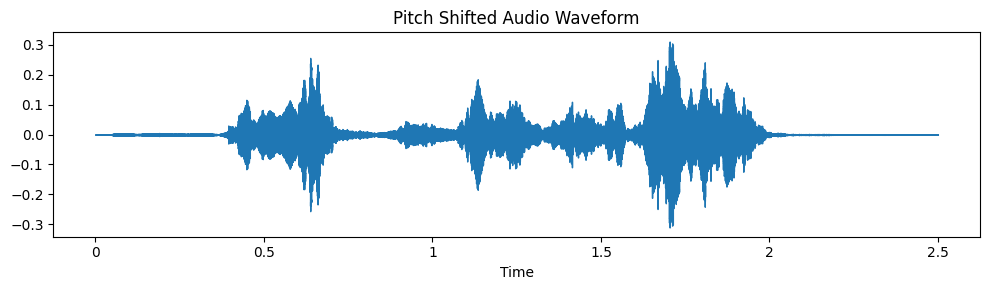

▶️Playing Pitch Shifted Audio:


In [43]:
# Apply pitch shift
data_pitch = pitch_shift(data, sr)

# Plot
plt.figure(figsize=(10, 3))
librosa.display.waveshow(data_pitch, sr=sr)
plt.title("Pitch Shifted Audio Waveform")
plt.tight_layout()
plt.show()

# Play pitch shifted audio
print("▶️Playing Pitch Shifted Audio:")
ipd.display(ipd.Audio(data_pitch, rate=sr))

 Now run `get_features(path)` on any audio file to get a `(4, N)` matrix of features — one for each version (original, noise, pitch, pitch+noise).

#### **Save Extracted Features and Labels**

In [3]:
import numpy as np
import pandas as pd
import os
import mimetypes
from pathlib import Path

In [45]:
import mimetypes
from pathlib import Path

def is_audio_file(filepath):
    mime = mimetypes.guess_type(filepath)[0]
    return mime is not None and 'audio' in mime

In [48]:
import numpy as np
import pandas as pd
import os

SAVE_DIR = "/content/drive/MyDrive/VoiceSense_Dataset/mel_data_final"
os.makedirs(SAVE_DIR, exist_ok=True)

np.save(os.path.join(SAVE_DIR, "mel_spectrograms.npy"), X)
np.save(os.path.join(SAVE_DIR, "labels.npy"), y)

# Optionally: Save just the labels to CSV
pd.DataFrame({'Emotion': y}).to_csv(os.path.join(SAVE_DIR, "labels.csv"), index=False)

print(f"✅ Mel data saved: {X.shape}, Labels saved: {y.shape}")

✅ Mel data saved: (5801, 128, 130), Labels saved: (5801,)


## **Train a Convolutional Neural Network (CNN) on Mel spectrograms to classify emotional tone (e.g., angry, happy, neutral).**

---



##  Voice Emotion Classification - Dataset Prep Pipeline

### 1. Imports and Setup
- Load essential packages: `librosa`, `PyTorch`, `audiomentations`, `sklearn`, `tqdm`.
- Define spectrogram parameters and preprocessing functions.

### 2. Label Encoding
- Convert string labels (e.g., "happy", "sad") to numeric class indices.
- Map labels with `label_to_idx` and stored reverse map with `idx_to_label`.

### 3. Train-Test Split
- Use `train_test_split` to divide mel spectrograms and labels (80-20 stratified).

### 4. PyTorch Dataset Class
- Create `MelDataset` to return:
  - `mel_tensor`: shape `(1, 128, 130)` for CNN input.
  - `label_tensor`: integer class label.

### 5. Handling Imbalanced Classes
- Compute class-wise inverse frequency for `WeightedRandomSampler`.

### 6. DataLoaders
- Final loaders: `train_loader` uses sampling, `val_loader` uses fixed shuffle.

In [6]:
!pip install -q audiomentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 11.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


In [4]:
X = np.load("/content/drive/MyDrive/VoiceSense_Dataset/mel_data_final/mel_spectrograms.npy")
y = np.load("/content/drive/MyDrive/VoiceSense_Dataset/mel_data_final/labels.npy")



### ------- Handle Class Imbalance with Weighted Sampling  
Calculates inverse frequency weights for each class label in the training set.  
These weights are used to construct a `WeightedRandomSampler`, so the DataLoader draws balanced batches even from imbalanced datasets.  
Prevents overfitting to dominant emotion classes (e.g., “neutral” or “calm”).


### ------- Create PyTorch DataLoaders  
Wraps the training and validation datasets into DataLoaders.  
- Training DataLoader uses weighted sampling and enables audio augmentation.  
- Validation DataLoader disables augmentation and loads data normally.  
Both are configured with `batch_size = 16` and return `(mel_tensor, label)` pairs.

In [7]:
# Imports and Setup
import os, random
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift




In [8]:
# Encode labels as integers
unique_labels = sorted(set(y)) # list of emotion strings
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_label = {v: k for k, v in label_to_idx.items()}

# Encode all labels
y_encoded = np.array([label_to_idx[label] for label in y])

In [9]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [10]:
# Dataset for Precomputed Mel Spectrograms

class MelDataset(Dataset):
    def __init__(self, mel_spectrograms, labels):
        self.X = mel_spectrograms
        self.y = labels

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        mel = self.X[idx]                      # shape: (128, 130)
        mel_tensor = torch.tensor(mel).unsqueeze(0).float()  # shape: (1, 128, 130)

        label = int(self.y[idx])              # ensure it's an integer
        label_tensor = torch.tensor(label).long()

        return mel_tensor, label_tensor

In [11]:
from torch.utils.data import DataLoader, WeightedRandomSampler

# Weighted Sampling for Class Imbalance
class_weights = 1. / np.bincount(y_train)
sample_weights = [class_weights[l] for l in y_train]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

#  Data Loaders
train_dataset = MelDataset(X_train, y_train)
val_dataset = MelDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Define Convolutional Neural Network (CNN) Model  
Builds a deep CNN to classify emotional tone from Mel spectrogram input.  
The architecture includes:
- 4 convolutional blocks with BatchNorm and ReLU
- MaxPooling after each conv layer to reduce spatial size
- Dropout for regularization
- Fully connected layer + softmax for classification

The input shape is `(1, 128, T)` and output shape is `(batch_size, num_classes)`.


**Setup:**
- CNN model trained on mel spectrograms
- Handles class imbalance with weighted `CrossEntropyLoss`
- Uses PyTorch `DataLoader` with `WeightedRandomSampler`
- Early stopping based on validation accuracy

**Training Flow:**
1. For each epoch:
   - Forward pass on training data
   - Backpropagation and weight updates
2. Evaluation on validation set
3. Save best model (`best_emotion_model.pth`)
4. Stop early if no improvement in N epochs (`patience=5`)


Also uses:
- Weighted loss (to handle class imbalance)
- `Adam` optimizer

In [12]:
import torch
import torch.nn as nn

class DeepEmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeepEmotionCNN, self).__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),  # (1, 128, 130) -> (64, 64, 65)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),  # (128, 64, 65) -> (128, 32, 32)

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),  # -> (256, 16, 16)

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2)   # -> (512, 8, 8)
        )

        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(512 * 8 * 8, num_classes)  # 32768 input units

    def forward(self, x):
        x = self.conv_block(x)             # [B, 512, 8, 8]
        x = x.view(x.size(0), -1)          # flatten to [B, 32768]
        x = self.dropout(x)
        return self.fc(x)                  # logits

In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepEmotionCNN(num_classes=len(label_to_idx)).to(device)

# Weighted loss to address class imbalance
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).float().to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

best_acc = 0.0
patience = 5
patience_counter = 0

for epoch in range(1, 51):
    model.train()
    total_loss = 0
    correct_train, total_train = 0, 0

    print(f"\n🔁 Epoch {epoch}")

    # Training loop with tqdm
    for mel, label in tqdm(train_loader, desc=f"Training Epoch {epoch}"):
        mel, label = mel.to(device), label.to(device)

        optimizer.zero_grad()
        out = model(mel)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct_train += (pred == label).sum().item()
        total_train += label.size(0)

    train_acc = correct_train / total_train * 100

    # Validation loop
    model.eval()
    correct_val, total_val = 0, 0
    with torch.no_grad():
        for mel, label in tqdm(val_loader, desc=" Validating"):
            mel, label = mel.to(device), label.to(device)
            out = model(mel)
            pred = out.argmax(dim=1)
            correct_val += (pred == label).sum().item()
            total_val += label.size(0)

    val_acc = correct_val / total_val * 100

    print(f"\nEpoch {epoch} Summary:")
    print(f"  Loss      : {total_loss:.4f}")
    print(f"  Training Accuracy  : {train_acc:.2f}%")
    print(f"   Val Accuracy   : {val_acc:.2f}%")

    # Early stopping only
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        print(f" No improvement. Patience {patience_counter}/{patience}")
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break


# Save inside the condition that checks for the best val accuracy
if val_acc > best_acc:
    best_acc = val_acc
    patience_counter = 0
    torch.save(model.state_dict(), "/content/drive/MyDrive/best_emotion_model.pth")
    print("Model saved to Drive (new best)!")


🔁 Epoch 1


Training Epoch 1:  48%|████▊     | 139/290 [04:20<04:36,  1.83s/it]

# **Improving the Accuracy**

#Emotion Classification Model – Accuracy

## Confusion Matrix Analysis
- Visualize misclassifications.
- Focus on improving classes with low precision/recall, especially `sad`, `neutral`, and `happy`.

---

## Implementation Notes
- Dataset: **RAVDESS Emotion Dataset** (8 emotion classes).
- Evaluation: We use `classification_report` and `confusion_matrix`.
- Spectrogram tensors are padded to a fixed length to avoid `stack()` errors during batching.

---



In [ ]:
!pip install -q librosa torchaudio matplotlib scikit-learn audiomentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 836.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       angry     0.3137    0.4103    0.3556        78
        calm     0.0000    0.0000    0.0000        79
     disgust     0.3684    0.0897    0.1443        78
     fearful     0.0000    0.0000    0.0000        78
       happy     0.0000    0.0000    0.0000        79
     neutral     0.0835    1.0000    0.1542        39
         sad     0.0000    0.0000    0.0000        78
   surprised     0.0000    0.0000    0.0000        79

    accuracy                         0.1327       588
   macro avg     0.0957    0.1875    0.0818       588
weighted avg     0.0960    0.1327    0.0765       588



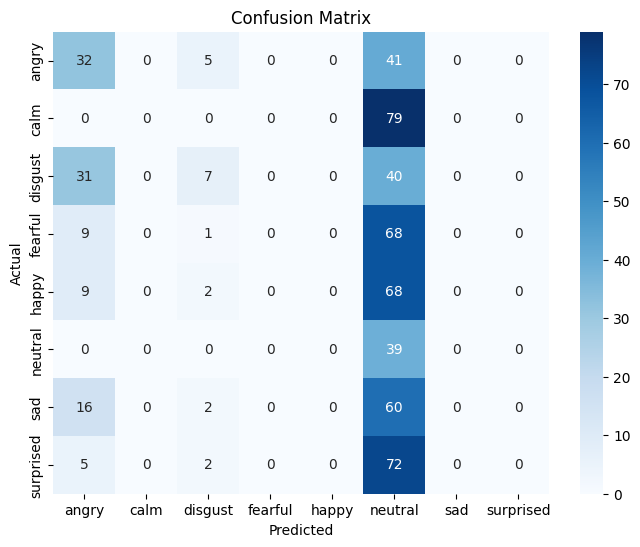

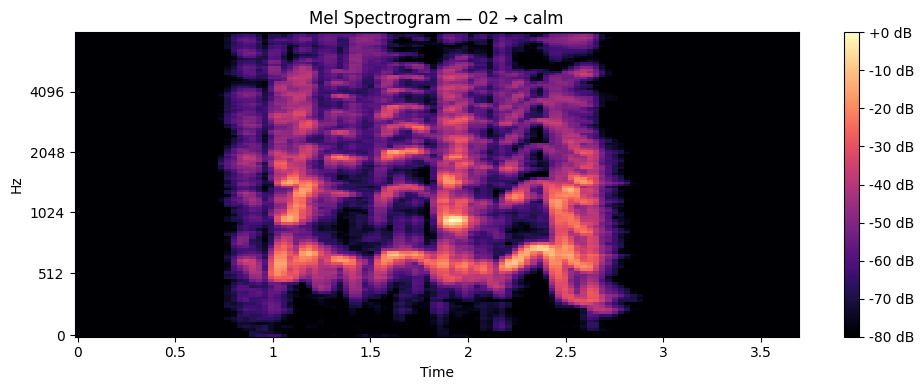

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(
    all_labels, all_preds,
    target_names=label_to_idx.keys(),
    digits=4
))


# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_to_idx.keys(),
            yticklabels=label_to_idx.keys(), cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



# Visualize Sample Mel Spectrogram
def visualize_sample(idx=0):
    y, sr = librosa.load(train_files[idx], sr=16000)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel Spectrogram — {files[idx].split('-')[2]} → {list(label_to_idx.keys())[labels[idx]]}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

# Run the visualizer
visualize_sample()

# **Mel Spectrogram Visualization Function**

In [ ]:
# Dataset Class
class EmotionDataset(Dataset):
    def __init__(self, file_paths, labels, augment_audio=False, max_len=128):
        self.paths = file_paths
        self.labels = labels
        self.augment = augment_audio
        self.max_len = max_len

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        y, sr = librosa.load(self.paths[idx], sr=16000)
        if self.augment:
            y = augment(samples=y, sample_rate=sr)
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_db = librosa.power_to_db(mel, ref=np.max)
        mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-6)
        if mel_db.shape[1] < self.max_len:
            mel_db = np.pad(mel_db, ((0, 0), (0, self.max_len - mel_db.shape[1])), mode='constant')
        else:
            mel_db = mel_db[:, :self.max_len]
        return torch.tensor(mel_db).unsqueeze(0).float(), torch.tensor(self.labels[idx])


In [ ]:


# Weighted Sampling
class_weights = 1. / np.bincount(train_labels)
sample_weights = [class_weights[l] for l in train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

train_loader = DataLoader(EmotionDataset(train_files, train_labels, augment_audio=True), batch_size=16, sampler=sampler)
val_loader = DataLoader(EmotionDataset(val_files, val_labels), batch_size=16)


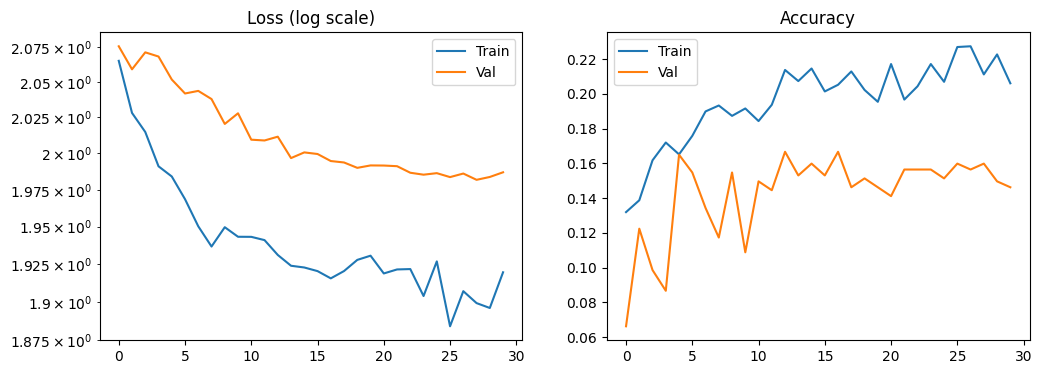

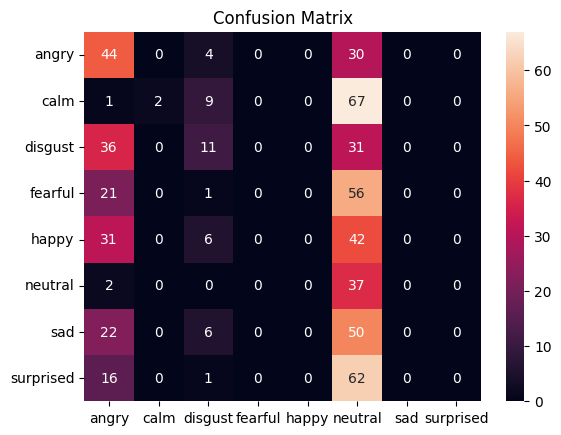

              precision    recall  f1-score   support

       angry       0.25      0.56      0.35        78
        calm       1.00      0.03      0.05        79
     disgust       0.29      0.14      0.19        78
     fearful       0.00      0.00      0.00        78
       happy       0.00      0.00      0.00        79
     neutral       0.10      0.95      0.18        39
         sad       0.00      0.00      0.00        78
   surprised       0.00      0.00      0.00        79

    accuracy                           0.16       588
   macro avg       0.21      0.21      0.10       588
weighted avg       0.21      0.16      0.09       588



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Visualize Results
# Log Loss Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Val')
plt.yscale("log")
plt.title("Loss (log scale)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Val')
plt.title("Accuracy")
plt.legend()
plt.show()


#Evaluate & Confusion Matrix
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for mel, label in val_loader:
        mel = mel.to(device)
        output = model(mel)
        all_preds.extend(output.argmax(1).cpu().numpy())
        all_labels.extend(label.numpy())

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_to_idx, yticklabels=label_to_idx)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(all_labels, all_preds, target_names=label_to_idx.keys()))

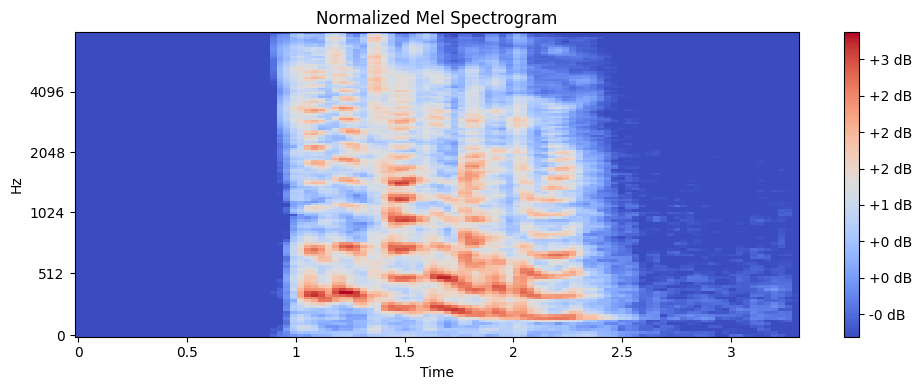

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

def visualize_mel(path):
    y, sr = librosa.load(path, sr=16000)

    # Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-6)  # normalize

    # Plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Normalized Mel Spectrogram")
    plt.tight_layout()
    plt.show()

# Trying a sample RAVDESS audio file
visualize_mel("/content/drive/MyDrive/VoiceSense_Dataset/Ravdees/Actor_04/03-01-01-01-01-01-04.wav")

# **training + evaluation loop**

## 📁 Step 2: Audio Preprocessing + Transcription

In this step:

1. Convert `first 100` `.mp3` audio files to `.wav` format using `pydub`
2. Transcribe each file using OpenAI Whisper (`medium` model)
3. 📄 Save all results to `en_transcriptions.csv` for further annotation

### 📌 Output
- `/content/wav_samples_en/` → Cleaned `.wav` files
- `/content/en_transcriptions.csv` → Transcribed results for 1000 English samples


In [ ]:
# ✅ Install faster-whisper (CTranslate2 version)
!pip install faster-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00


# **✅ Select  Multilingual TTS Model**



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **Load CSV and Inspect**


In [ ]:
import os
import pandas as pd

AUDIO_ROOT = "/content/drive/MyDrive/VoiceSense_Dataset/data/"
new_rows = []

# Walk through all folders (e.g., credit_card, currency_exchange, etc.)
for intent_folder in os.listdir(AUDIO_ROOT):
    intent_path = os.path.join(AUDIO_ROOT, intent_folder)
    if not os.path.isdir(intent_path):
        continue

    for filename in os.listdir(intent_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(intent_folder, filename)  # relative path
            label = intent_folder  # intent is the folder name
            new_rows.append({"file_path": file_path, "label": label})

# Save new CSV
df = pd.DataFrame(new_rows)
csv_output_path = os.path.join(AUDIO_ROOT, "finmate_labels_updated.csv")
df.to_csv(csv_output_path, index=False)
print(f"✅ Updated CSV saved at: {csv_output_path}")

✅ Updated CSV saved at: /content/drive/MyDrive/VoiceSense_Dataset/data/finmate_labels_updated.csv


In [ ]:
import pandas as pd

# Load your labels file
df = pd.read_csv('/content/drive/MyDrive/VoiceSense_Dataset/data/finmate_labels_updated.csv')
df.head()

,file_path,label
0,credit_card/credit_card_01_uk.wav,credit_card
1,credit_card/credit_card_02_uk.wav,credit_card
2,credit_card/credit_card_03_uk.wav,credit_card
3,credit_card/credit_card_04_uk.wav,credit_card
4,credit_card/credit_card_05_uk.wav,credit_card


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1eDCEfy7tHgWJbVPa2CP5qoRVZMfp4fEiSo-iWm_Gf9I/edit#gid=0


# **Visualize & Listen**

/tmp/ipython-input-158-1406207958.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


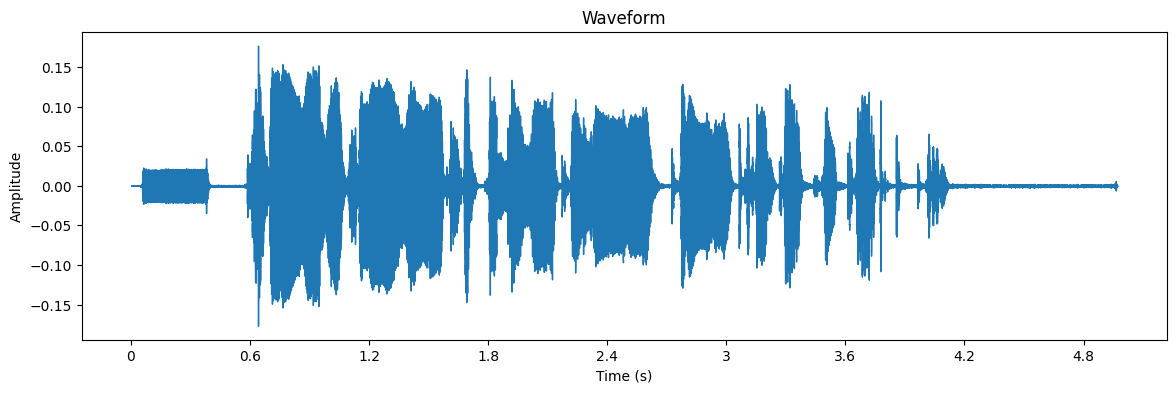

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load one audio sample
file_path = '/content/drive/MyDrive/VoiceSense_Dataset/data/credit_card/credit_card_03_uk.wav'  # Adjust path if needed
audio, sr = librosa.load(file_path)

# Plot waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play audio
ipd.Audio(audio, rate=sr)

🎧 Now playing: credit_card_01_uk.wav


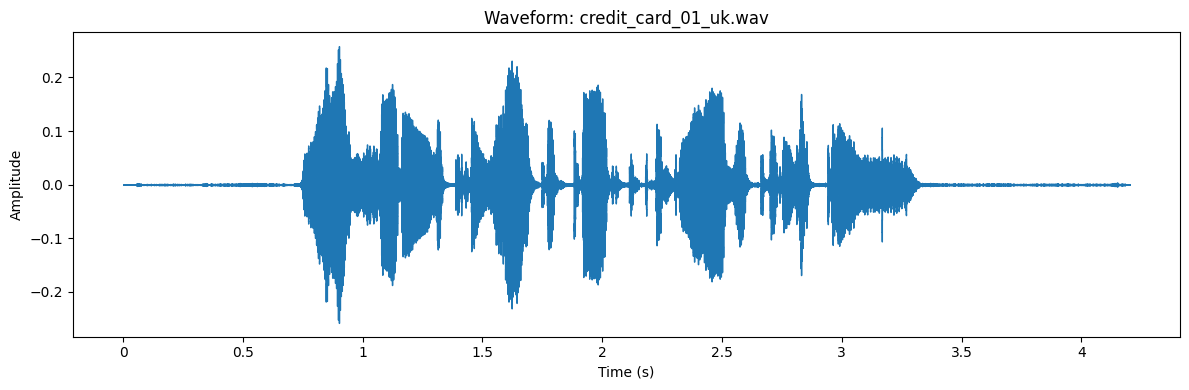

➡️ Press Enter to continue to next sample...
🎧 Now playing: credit_card_02_uk.wav


/tmp/ipython-input-144-1147562922.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


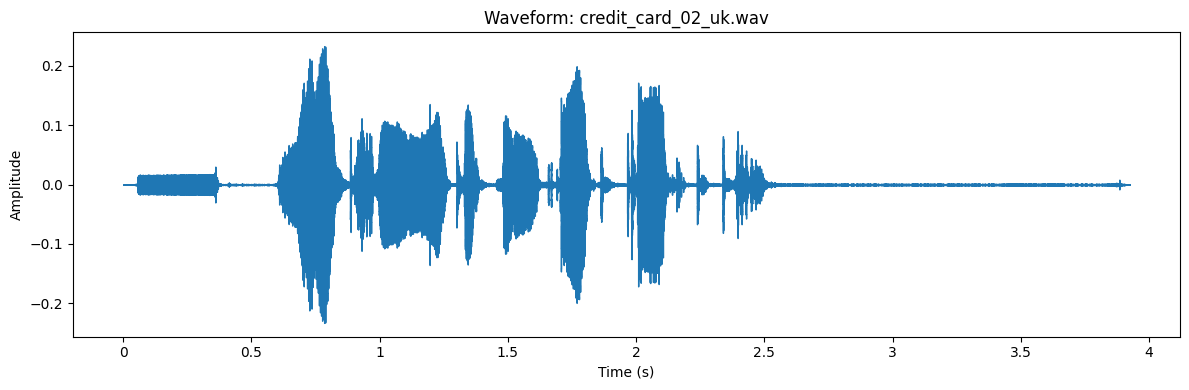

➡️ Press Enter to continue to next sample...
🎧 Now playing: credit_card_03_uk.wav


/tmp/ipython-input-144-1147562922.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


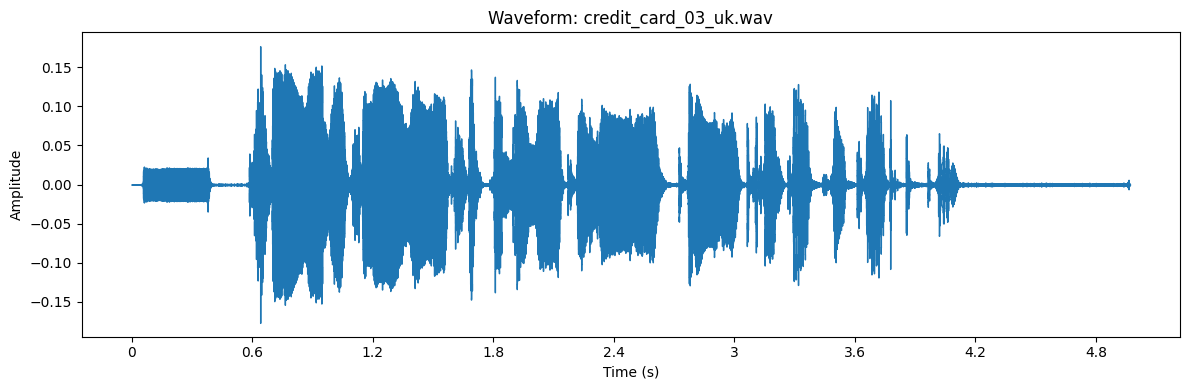

➡️ Press Enter to continue to next sample...
🎧 Now playing: credit_card_04_uk.wav


/tmp/ipython-input-144-1147562922.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


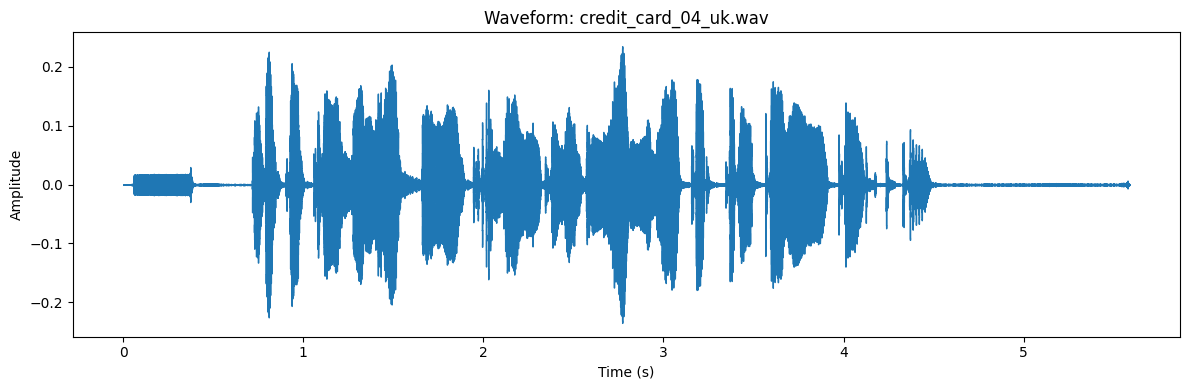

➡️ Press Enter to continue to next sample...
🎧 Now playing: credit_card_05_uk.wav


/tmp/ipython-input-144-1147562922.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


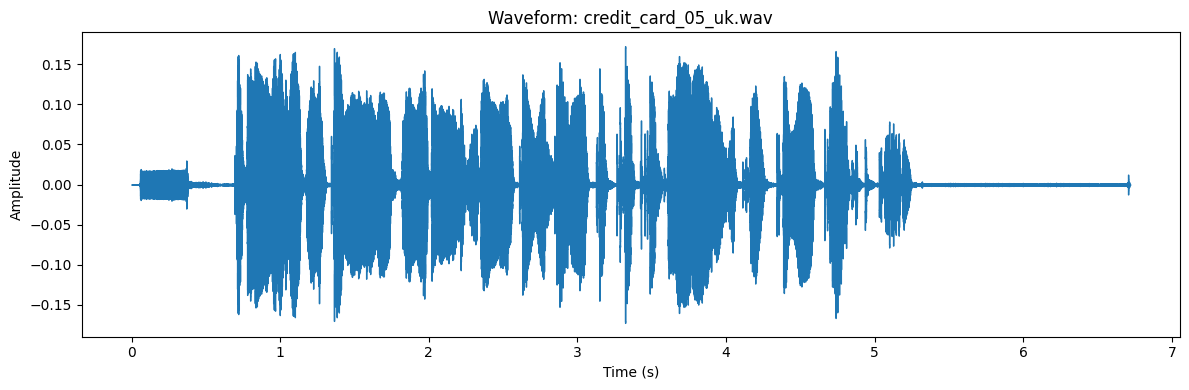

➡️ Press Enter to continue to next sample...


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

# Loop through multiple files in a folder
folder_path = "/content/drive/MyDrive/VoiceSense_Dataset/data/credit_card"  # Change as needed

# Get all .wav files
audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Inspect first 5 audio files (or change number)
for filename in audio_files[:5]:
    file_path = os.path.join(folder_path, filename)
    print(f"🎧 Now playing: {filename}")

    # Load audio
    audio, sr = librosa.load(file_path)

    # Plot waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform: {filename}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Play audio
    display(ipd.Audio(audio, rate=sr))

    #  wait for user input to continue
    input("➡️ Press Enter to continue to next sample...")

# **Plot Mel Spectogram**

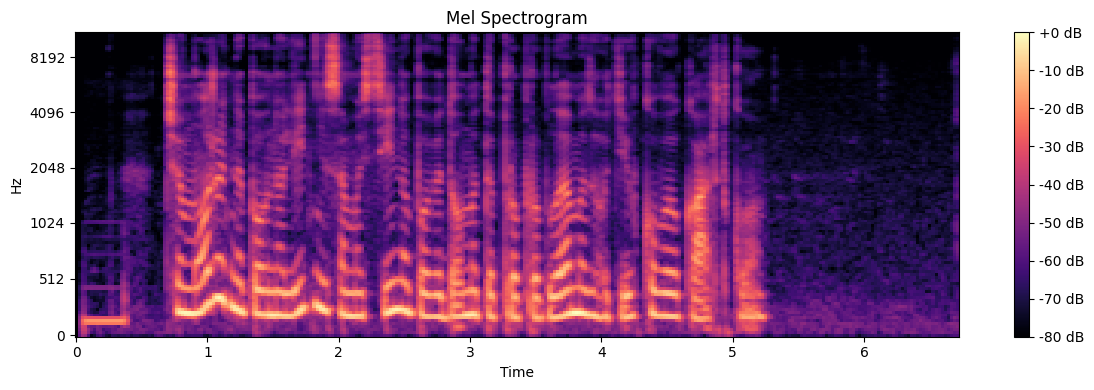

In [ ]:
# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

# Compatibility fix
if not hasattr(np, 'complex'):
    np.complex = complex

#  Base directories
AUDIO_DIR = "/content/drive/MyDrive/VoiceSense_Dataset/data"
CSV_PATH = os.path.join(AUDIO_DIR, "finmate_labels_updated.csv")
OUTPUT_DIR = os.path.join(AUDIO_DIR, "spectrograms")

# Delete old spectrograms
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
    print("🧹 Old spectrograms deleted.")

# Recreate output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define matching function
def find_actual_file(base_dir, partial_path):
    full_path = os.path.join(base_dir, partial_path)
    return full_path if os.path.exists(full_path) else None

#  Define spectrogram function
def save_spectrogram(file_path, output_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        plt.figure(figsize=(10, 6))
        # Waveform
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title("Waveform")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        # Mel Spectrogram
        plt.subplot(2, 1, 2)
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_db = librosa.power_to_db(mel, ref=np.max)
        librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
        plt.title("Mel Spectrogram")
        plt.colorbar(format='%+2.0f dB')

        plt.tight_layout()
        plt.savefig(output_path)
        plt.close()
        print(f"✅ Saved: {output_path}")
    except Exception as e:
        print(f"❌ Error with {file_path}: {e}")

# ✅ Load updated labels and run
df = pd.read_csv(CSV_PATH)

for _, row in df.iterrows():
    relative_path = row['file_path']
    full_path = find_actual_file(AUDIO_DIR, relative_path)

    if not full_path:
        print(f"❌ Skipped: {relative_path} (no matching file found)")
        continue

    filename = os.path.basename(full_path)
    output_path = os.path.join(OUTPUT_DIR, f"{os.path.splitext(filename)[0]}.png")
    save_spectrogram(full_path, output_path)

🧹 Old spectrograms deleted.


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_01_uk.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_02_uk.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_03_uk.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_04_uk.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_05_uk.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_04_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_05_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_03_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_02_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/credit_card_01_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_03_az.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_02_az.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_02_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_05_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_01_az.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_04_az.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_01_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_03_en.png
✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_05_az.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/remittance_04_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_02_hd.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_01_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_05_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_04_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_01_hd.png
✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_02_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_04_hd.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_03_hd.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/report_scam_05_hd.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_05_cm.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_01_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_03_cm.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_02_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_04_en.png
✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_01_cm.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_02_cm.png
✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/currency_exchange_04_cm.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/open_account_04_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/open_account_03_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/open_account_05_en.png


/tmp/ipython-input-169-1805038399.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/open_account_02_en.png
✅ Saved: /content/drive/MyDrive/VoiceSense_Dataset/data/spectrograms/open_account_01_en.png




### **✅ Next Step: Create `emotion_labels.csv'**

Preparation of a CSV file that includes the audio file paths and placeholder columns for emotion tags.

Each voice clip will be tagged with one of the following **emotion labels**:

- `neutral`
- `happy`
- `angry`
- `sad`
- `confused`
- `frustrated`

Then label each emotions in two ways:
1. **Manual Annotation** – using an interactive dropdown UI in Colab (e.g., `Audio() + Dropdown + Save`)
2. **Semi-Automatic Annotation** – use Whisper transcription + GPT-based tone analysis to assist

---

### 🗂️ Output File Format: `emotion_labels.csv`

| path           | sentence                       | emotion     |
|----------------|--------------------------------|-------------|
| clip_00001.mp3 | I want to open an account.     | neutral     |
| clip_00002.mp3 | My card got blocked again!     | frustrated  |
| clip_00003.mp3 | They stole my money!           | angry       |

---



# ✅ Step: Generate finetune_slu.yaml

 focusing  it on SLU Transformer/Conformer and match it with the existing pretrained checkpoint (from SLURP 2-pass).

# ** Auto-tag Multilingual text File with Language Prefixes*

# **View tokens.txt (all characters in training set)t**